# Notebook : Financial spendings dataset

This notebook is intended for WD team. For each line code, a description of what has been done and why is provided.

By importing the most important libraries, the code is making it possible to perform a wide range of data analysis and visualization tasks using Python.

- "pandas": provides data structures for efficiently storing and manipulating large datasets
- "numpy": provides tools for performing numerical operations on arrays and matrices
- "matplotlib.pyplot": provides functions for creating visualizations, such as plots and charts
- "seaborn": provides a high-level interface for creating statistical graphics, such as heatmaps and scatterplots
- "os": provides a way to interact with the operating system, such as navigating directories and accessing files.

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

ModuleNotFoundError: No module named 'pandas'

# Dataset Pre-processing

Importing data as a CSV file into Python
We do these lines of code to get the current working directory, define a variable to store the path to a CSV file, and read the data from the CSV file into a pandas DataFrame. This is a typical data loading process for a data analysis or machine learning project, where we need to load data into memory to start working with it.



In [ ]:
# Reading in the CSV
# This is a function call to the os module, which provides a way to interact with the operating system. The getcwd() function returns the current working directory as a string.
os.getcwd()
file_path01 = r"../data/cristina_dataset/Cristina_Dataset_230316.csv"
# This line reads the CSV file specified by file_path01 into a pandas DataFrame and assigns it to the variable df. The pd prefix indicates that the pandas module has been imported and is being used to read the CSV file. The resulting DataFrame can be manipulated and analyzed using pandas functions and methods.
df = pd.read_csv(file_path01)

"df" stands for "dataframe", which is a tabular data structure provided by the Pandas library.
It prints an overview of the rows and columns.

In [ ]:
#Looking at the dataset
df

,Category,Detail,Cost,Date
0,Eating Out,Brunch,€15.00,25-Jul-2022
1,Shopping,Uniqlo,€144.50,25-Jul-2022
2,Hobbies,Salsa Class,€130.00,27-Jul-2022
3,Groceries,Groceries,€6.78,27-Jul-2022
4,Eating Out,Ditsch,€2.00,27-Jul-2022
...,...,...,...,...
324,Groceries,Groceries,€8.26,21-Feb-2023
325,Groceries,Groceries,€27.25,22-Feb-2023
326,Groceries,Groceries,€13.69,23-Feb-2023
327,Rent + Bills,Phone Norway,€4.50,24-Feb-2023


## Data Inspection and cleaning

### Checking for NA values
The code is composed of three method calls chained together using the dot notation:

df.isna(): This method returns a DataFrame of the same shape as df, where each element is a boolean value indicating whether that element is missing (i.e., NaN or None) or not.

.sum(): This method is then called on the boolean DataFrame returned by df.isna(). It calculates the sum of all True values along each column, effectively counting the number of missing values in each column.

In [ ]:
#Checking for NA values
#Return a Pandas Series object that contains the count of missing values in each column of the DataFrame df.
df.isna().sum()

Category    0
Detail      0
Cost        0
Date        0
dtype: int64

In [ ]:
#Checking data types
df.dtypes

Category    object
Detail      object
Cost        object
Date        object
dtype: object

In [ ]:
# Checking the shape of the dataframe
print("The dataframe has " +str(df.shape[0]) +" rows and " +str(df.shape[1])+ " columns.")

The dataframe has 329 rows and 4 columns.


In [ ]:
# check for duplicate rows where every column value is duplicated
duplicate_rows = df[df.duplicated(subset=df.columns, keep=False)]

# print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Category, Detail, Cost, Date]
Index: []


### Conversion of date 
This line of code converts the 'Date' column in a pandas DataFrame df from a string format to a datetime format using the pd.to_datetime() function from the Pandas library.

The pd.to_datetime() function is important because datetime objects are a more suitable format for working with dates in data analysis and machine learning tasks. With datetime objects, you can easily manipulate dates and perform operations such as calculating time differences between dates.

Additionally, having the dates in datetime format allows for easier sorting and filtering of the data based on dates. This can be useful for tasks such as time series analysis or plotting data over time.

In [ ]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

### Conversion from string to float

This line of code is important because it is converting a string column 'Cost' in a pandas DataFrame df to a numeric (float) data type.

The code is doing this by first replacing the Euro sign '€' in each cell of the 'Cost' column with an empty string, effectively removing it. Then it is using the astype() method to convert the resulting strings to float data type.

This is important because many statistical and machine learning operations require numeric data. By converting the 'Cost' column from a string data type to a float data type, we can perform mathematical operations on it and use it in modeling tasks.

Without this line of code, the 'Cost' column would have remained as strings, and any mathematical operations on it would have resulted in errors.

In [ ]:
# Convert the 'cost' column to float
df['Cost'] = df['Cost'].str.replace('€', '').astype(float)

In [ ]:
# Checking code worked
df.dtypes

Category            object
Detail              object
Cost               float64
Date        datetime64[ns]
dtype: object

### The first and last day of the dataset
By finding the minimum and maximum values in the Date column, you can get a sense of the range of dates covered by the data in the DataFrame. This information can be useful for data exploration and analysis, as it can help you understand how far back in time your data goes, and whether there are any missing dates in the dataset.

Additionally, knowing the range of dates can help you determine if your data is complete and if you need to fill in any gaps

In [ ]:
# Checking the first and last day of the dataset
df.Date.min(),df.Date.max()

(Timestamp('2022-07-25 00:00:00'), Timestamp('2023-02-24 00:00:00'))

### Count of data points per month
 Displays the count of values in the "Category" column for each month of the year. This can provide valuable insights into the frequency and distribution of different categories throughout the year, which may be useful for trend analysis. As you can see below, July has only 13 data points.

In [ ]:
# Count of data points per month
df.groupby(df.Date.dt.month)['Category'].count()

Date
1     40
2     46
7     13
8     53
9     47
10    44
11    46
12    40
Name: Category, dtype: int64

### Classification by month period

The following lines of code creates a new column named "Month_period" in a pandas DataFrame called "df". The purpose of this new column is to label each row of the DataFrame with a period corresponding to the month in which the row's date falls.

The script defines a dictionary named "periods" that maps each period label to a tuple of start and end dates. These dates define the time span of each period, which runs from the 25th of one month to the 24th of the following month. The script then sorts the keys of the "periods" dictionary in chronological order based on the start date of each period.

Next, the script iterates over the "periods" dictionary and uses the start and end dates to create a boolean mask that selects the rows of the DataFrame that fall within each period. The script then assigns the corresponding period label to a new column named "Month_period" for each selected row.

Finally, the script prints the head of the DataFrame to check the new column has been added correctly.

The script is important because it enables the labeling of rows in the DataFrame with a period, which can facilitate the analysis of data over time. This approach of creating a period label based on fixed start and end dates can also help to standardize the analysis of data that spans multiple months.

In [ ]:
# Defining the start and end dates for each period.
# Pay day falls close to or on the 25th of every month.  
# Period starts on the 25th until the 24th of the following month.
periods = {'Jul - Aug 22': ('2022-07-25', '2022-08-24'),
           'Aug - Sep 22': ('2022-08-25', '2022-09-24'),
           'Sep - Oct 22': ('2022-09-25', '2022-10-24'),
           'Oct - Nov 22': ('2022-10-25', '2022-11-24'),
           'Nov - Dec 22': ('2022-11-25', '2022-12-24'),
           'Dec - Jan 22': ('2022-12-25', '2023-01-24'),
           'Jan - Feb 23': ('2023-01-25', '2023-02-24')}

# Sort the keys in chronological order
periods = dict(sorted(periods.items(), key=lambda x: pd.to_datetime(x[1][0])))

# Iterating over the periods and creating a new column with the corresponding period label
for period, dates in periods.items():
    start_date = pd.to_datetime(dates[0])
    end_date = pd.to_datetime(dates[1])
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    df.loc[mask, 'Month_period'] = period

# Checking the new column
df.head()

,Category,Detail,Cost,Date,Month_period
0,Eating Out,Brunch,15.00,2022-07-25,Jul - Aug 22
1,Shopping,Uniqlo,144.50,2022-07-25,Jul - Aug 22
2,Hobbies,Salsa Class,130.00,2022-07-27,Jul - Aug 22
3,Groceries,Groceries,6.78,2022-07-27,Jul - Aug 22
4,Eating Out,Ditsch,2.00,2022-07-27,Jul - Aug 22


### Monthly Period vs Cost vs Category

These lines of code perform two operations:

- Grouping: The first line groups the rows of a Pandas DataFrame df by the values in the column 'Month_period', and calculates the sum of the corresponding values in the 'Cost' column for each group. The resulting object month_period_costs is a Pandas Series that contains the total costs for each unique month_period.

- Sorting: The second line sorts the values in month_period_costs according to the chronological order of the periods. The ordering is determined by the periods dictionary, which presumably maps the month_period values to their corresponding chronological order.

The output of these operations is a Pandas Series object month_period_costs that contains the total costs for each unique month_period, sorted in chronological order.

These lines of code are important for several reasons. Firstly, they allow for quick and efficient analysis of large datasets by grouping and summarizing data. Secondly, by sorting the data in chronological order, it is easier to identify trends and patterns over time. Finally, the use of the Pandas library in Python is highly effective for handling and analyzing tabular data, making it a powerful tool for data analysis and scientific research.


In [ ]:
# Grouping by month_period and summing the costs
month_period_costs = df.groupby('Month_period')['Cost'].sum().round(2)

# Sort the results by the chronological order of the periods
month_period_costs = month_period_costs.reindex(list(periods.keys()))

print(month_period_costs)

Month_period
Jul - Aug 22    1728.87
Aug - Sep 22    1776.55
Sep - Oct 22    1631.22
Oct - Nov 22    1098.53
Nov - Dec 22    1374.09
Dec - Jan 22    1178.47
Jan - Feb 23    1593.46
Name: Cost, dtype: float64


In [ ]:
# Grouping by month_period and category and summing the costs, then sorting in chronological order
month_period_category_costs = df.groupby(['Month_period', 'Category'])['Cost'].sum().round(2)
month_period_category_costs = month_period_category_costs.reindex(pd.MultiIndex.from_product([periods.keys(), df['Category'].unique()], names=['Month_period', 'Category']))

print(month_period_category_costs)

Month_period  Category    
Jul - Aug 22  Eating Out      116.40
              Shopping        201.29
              Hobbies         174.34
              Groceries       362.07
              Rent + Bills    637.75
                               ...  
Jan - Feb 23  Transport       180.77
              Student Loan     82.43
              Travel          290.62
              Healthcare       67.11
              Selfcare           NaN
Name: Cost, Length: 77, dtype: float64


# Visualizations

**Bar chart**

These lines of code create a stacked bar chart that displays the total cost by category for each month period. The chart also includes a dotted horizontal line at the average cost per month period.

These lines of code are important because they allow us to quickly visualize and analyze the cost data by category and month period. The stacked bar chart makes it easy to compare the relative costs of each category across different periods, and the dotted line provides a reference for the average cost per period. This kind of visualization can help identify trends, patterns, and outliers in the data, as well as inform decision-making and resource allocation.

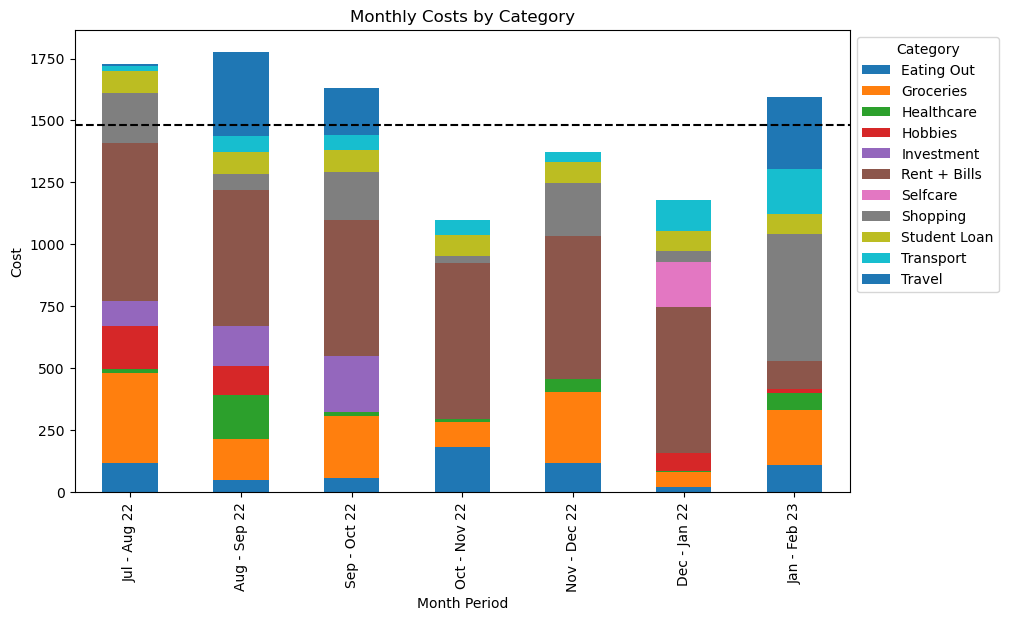

In [ ]:
# Grouping by month_period and category and summing the costs, then sorting in chronological order
month_period_category_costs = df.groupby(['Month_period', 'Category'])['Cost'].sum().round(2)
month_period_category_costs = month_period_category_costs.unstack(level=-1).reindex(list(periods.keys()))

# Calculate the total cost per month period
total_cost = month_period_category_costs.sum(axis=1)

# Calculate the average cost per month period to show in a dotted line
avg_cost = total_cost.mean()

# Create a stacked bar chart
ax = month_period_category_costs.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add a dotted horizontal line at the average cost per month period
ax.axhline(y=avg_cost, color='black', linestyle='--')

# Add labels and a legend
ax.set_title('Monthly Costs by Category')
ax.set_xlabel('Month Period')
ax.set_ylabel('Cost')
ax.legend(title='Category', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

